# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [261]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
!pip install newsapi-python

%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/khalidromain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [262]:
# Read your api key environment variable
# YOUR CODE HERE!     852157e3e69c41448401079c7e425ab4
# Load env variables and read the News API Key enviroment variable
api_key="852157e3e69c41448401079c7e425ab4"


In [263]:
# Create a newsapi client
# YOUR CODE HERE!

from newsapi.newsapi_client import NewsApiClient

# Init
newsapi = NewsApiClient(api_key)



In [264]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE
top_headlines_btc = newsapi.get_everything(q='bitcoin',
                                          language='en',
                                          sort_by= 'relevancy')




In [265]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
top_headlines_eth = newsapi.get_everything(q='ethereum',
                                          language='en',
                                          sort_by= 'relevancy')

In [266]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in top_headlines_btc["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns


btc_df.head()

,text,compound,positive,negative,neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
3,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
4,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831


In [267]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in top_headlines_eth["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns


eth_df.head()

,text,compound,positive,negative,neutral
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899


In [268]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.139520,0.081750,0.042900,0.875350
std,0.457346,0.059843,0.058105,0.065999
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.301550,0.043250,0.000000,0.835500
50%,0.213950,0.064000,0.000000,0.876000
75%,0.585900,0.129250,0.088500,0.917000
max,0.778300,0.185000,0.169000,1.000000


In [269]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.028545,0.045000,0.032100,0.922900
std,0.266069,0.042921,0.048382,0.070403
min,-0.680800,0.000000,0.000000,0.775000
25%,-0.102700,0.000000,0.000000,0.889750
50%,0.000000,0.043500,0.000000,0.942500
75%,0.121500,0.059500,0.059750,0.973000
max,0.557400,0.131000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A:Bitcoin has the highest positive mean score

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [270]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [271]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = stopwords.words('english')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = {'also', 'since', 'youve'}

In [272]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [273]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc = btc_df
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()


,text,compound,positive,negative,neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
3,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
4,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[netflix, making, docuseries, one, worst, rapp..."


In [274]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth= eth_df
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()



,text,compound,positive,negative,neutral,tokens
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[hackers, made, roughly, million, ethereum, cr..."
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, ageold,..."
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[back, september, robinhood, announced, plan, ..."
4,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[people, buy, cryptocurrencies, intended, hold..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [275]:
from collections import Counter
from nltk import ngrams

In [278]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_text = ' '.join(btc_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('el', 'salvador'): 3, ('alex', 'castro'): 3, ('blog', 'post'): 3, ('alongside', 'us'): 2, ('illustration', 'alex'): 2, ('international', 'monetary'): 2, ('castro', 'vergein'): 2, ('new', 'blog'): 2, ('post', 'company'): 2, ('company', 'said'): 2}


In [279]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_text = ' '.join(eth_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('blog', 'post'): 3, ('new', 'blog'): 2, ('post', 'company'): 2, ('company', 'said'): 2, ('according', 'new'): 2, ('char', 'crypto'): 2, ('char', 'online'): 2, ('online', 'thief'): 2, ('thief', 'made'): 2, ('wrapped', 'ethereum'): 2}


In [281]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

# Get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('char', 20),
 ('bitcoin', 12),
 ('company', 6),
 ('ha', 5),
 ('new', 5),
 ('el', 4),
 ('said', 4),
 ('salvador', 3),
 ('us', 3),
 ('alex', 3)]

In [282]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 19),
 ('ethereum', 8),
 ('new', 7),
 ('cryptocurrency', 7),
 ('crypto', 6),
 ('company', 5),
 ('million', 5),
 ('platform', 4),
 ('ha', 4),
 ('blog', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [221]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [222]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=" "):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

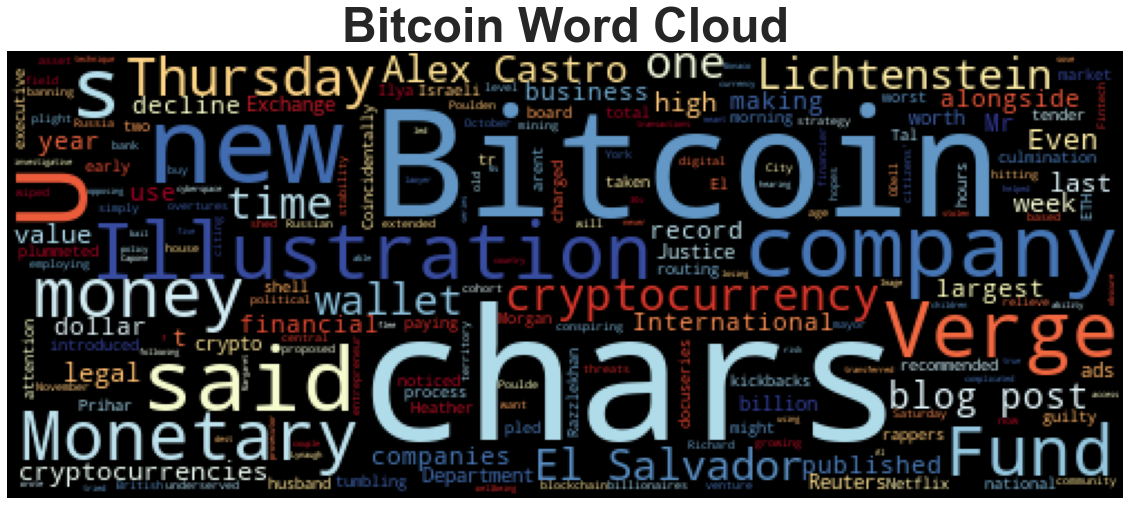

In [223]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

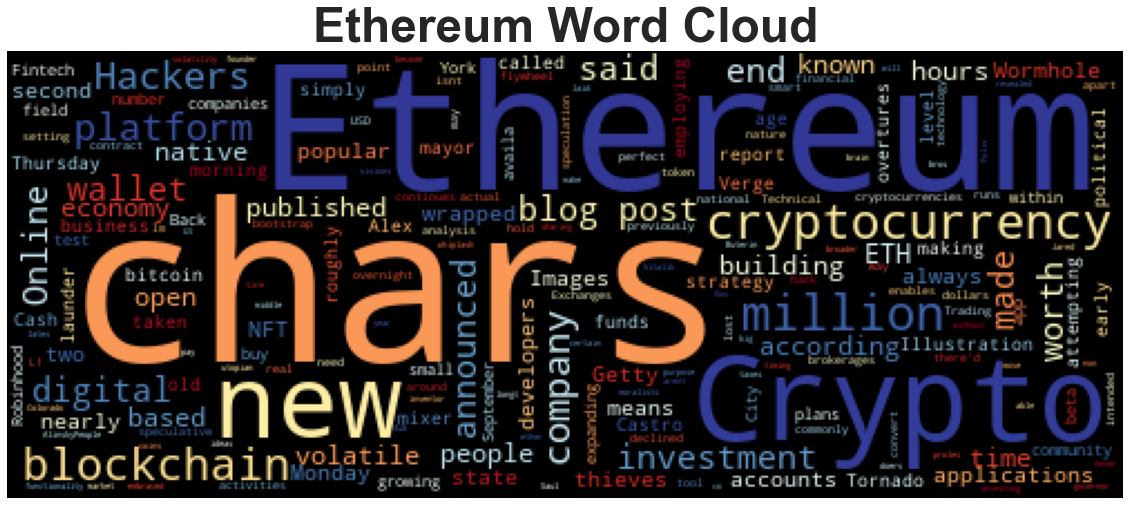

In [224]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [229]:
!pip install spacy
import spacy
from spacy import displacy

     |████████████████████████████████| 6.1 MB 3.5 MB/s eta 0:00:01
  Using cached spacy_legacy-3.0.8-py2.py3-none-any.whl (14 kB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
     |████████████████████████████████| 5.8 MB 25.1 MB/s eta 0:00:01
  Using cached spacy_loggers-1.0.1-py3-none-any.whl (7.0 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
     |████████████████████████████████| 601 kB 17.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 5.3 MB/s eta 0:00:01
  Using cached wasabi-0.9.0-py3-none-any.whl (25 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
     |████████████████████████████████| 104 kB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 449 kB 28.8 MB/s eta 0:00:01
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)


In [230]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 4.5 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [232]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [283]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text = ' '.join(btc_df.text)
bitcoin_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars] In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan

In [284]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_doc = nlp(bitcoin_text)
# Add a title to the document
# YOUR CODE HERE!
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [285]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent')

In [286]:
# List all Entities
# YOUR CODE HERE!
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

last week DATE
3 MONEY
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Fintech ORG
New York City GPE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DATE
ETF ORG
Fidelitys Wise Origin Bitcoin ORG
+202 GPE
Su

---

### Ethereum NER

In [287]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text = ' '.join(eth_df.text)
ethereum_text

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars] On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars] Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars] If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there\'d be no real need for crypto w

In [288]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_doc = nlp(ethereum_text)
# Add a title to the document
# YOUR CODE HERE!
ethereum_doc = nlp(ethereum_text)

In [289]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_doc, style='ent')

In [290]:
# List all Entities
# YOUR CODE HERE!
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Ethereum ORG
ETH-USD ORG
Crypto PERSON
Crypto.com ORG
about $34 million MONEY
Monday DATE
Ethereum ORG
-- Saul Alinsky People PERSON
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
Vitalik Buterin PERSON
Ethereum ORG
Last night TIME
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
Feb 7 DATE
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
OPEN ORG
second ORDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
over two hours TIME
YouTube ORG
Waka Flacka Fla ORG


---